In [1]:
from src.data_transforms import *
from src.image_loader import ImageLoader
from src.esfpnet import ESFPNetStructure
from src.trainer_1 import *
import torch
import os
from torch.utils.data import DataLoader, random_split
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
torch.cuda.empty_cache()

%load_ext autoreload
%autoreload 2

c:\Users\shuvo\.conda\envs\ece_bmed_6780_project\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
root_dir = os.getcwd()

c:\Users\shuvo\.conda\envs\ece_bmed_6780_project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\shuvo\.conda\envs\ece_bmed_6780_project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch:1 Train Loss:0.1995 Val Loss: 0.3248
Epoch:2 Train Loss:0.0490 Val Loss: 0.3984
Epoch:3 Train Loss:0.0406 Val Loss: 0.4132
Epoch:4 Train Loss:0.0372 Val Loss: 0.4029
Epoch:5 Train Loss:0.0341 Val Loss: 0.3773
Epoch:6 Train Loss:0.0337 Val Loss: 0.3539
Epoch:7 Train Loss:0.0316 Val Loss: 0.4187
Epoch:8 Train Loss:0.0308 Val Loss: 0.3544
Epoch:9 Train Loss:0.0296 Val Loss: 0.3984
Epoch:10 Train Loss:0.0295 Val Loss: 0.3529
Epoch:11 Train Loss:0.0290 Val Loss: 0.4047
Epoch:12 Train Loss:0.0281 Val Loss: 0.4069
Epoch:13 Train Loss:0.0278 Val Loss: 0.3848
Epoch:14 Train Loss:0.0263 Val Loss: 0.4180
Epoch:15 Train Loss:0.0264 Val Loss: 0.4337
Epoch:16 Train Loss:0.0270 Val Loss: 0.3610
Epoch:17 Train Loss:0.0254 Val Loss: 0.3949
Epoch:18 Train Loss:0.0248 Val Loss: 0.3806
Epoch:19 Train Loss:0.0247 Val Loss: 0.4019
Epoch:20 Train Loss:0.0246 Val Loss: 0.3891
Epoch:21 Train Loss:0.0243 Val Loss: 0.3762
Epoch:22 Train Loss:0.0241 Val Loss: 0.3986
Epoch:23 Train Loss:0.0235 Val Loss: 0.38

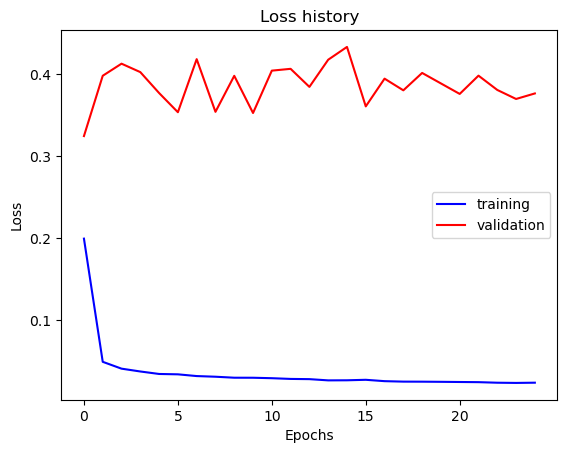

In [3]:
runner = Trainer(model_name='pspnet',
                 model_dir=os.path.join(root_dir, 'src'),
                 train_data_transforms=get_train_transforms(),
                 val_data_transforms=get_val_transforms(),
                 seg_type='infection',
                 train_im='./data/train/rp_lung_im.nii.gz',
                 train_msk='./data/train/rp_msk.nii.gz',
                 validation_im='./data/validation/medseg_lung_im.nii.gz',
                 validation_msk='./data/validation/medseg_msk.nii.gz',
                 batch_size=16,
                 load_from_disk=False)
runner.run_training_loop(num_epochs=25)
runner.plot_loss_history()
# runner.plot_accuracy()


torch.Size([16, 1, 512, 512])


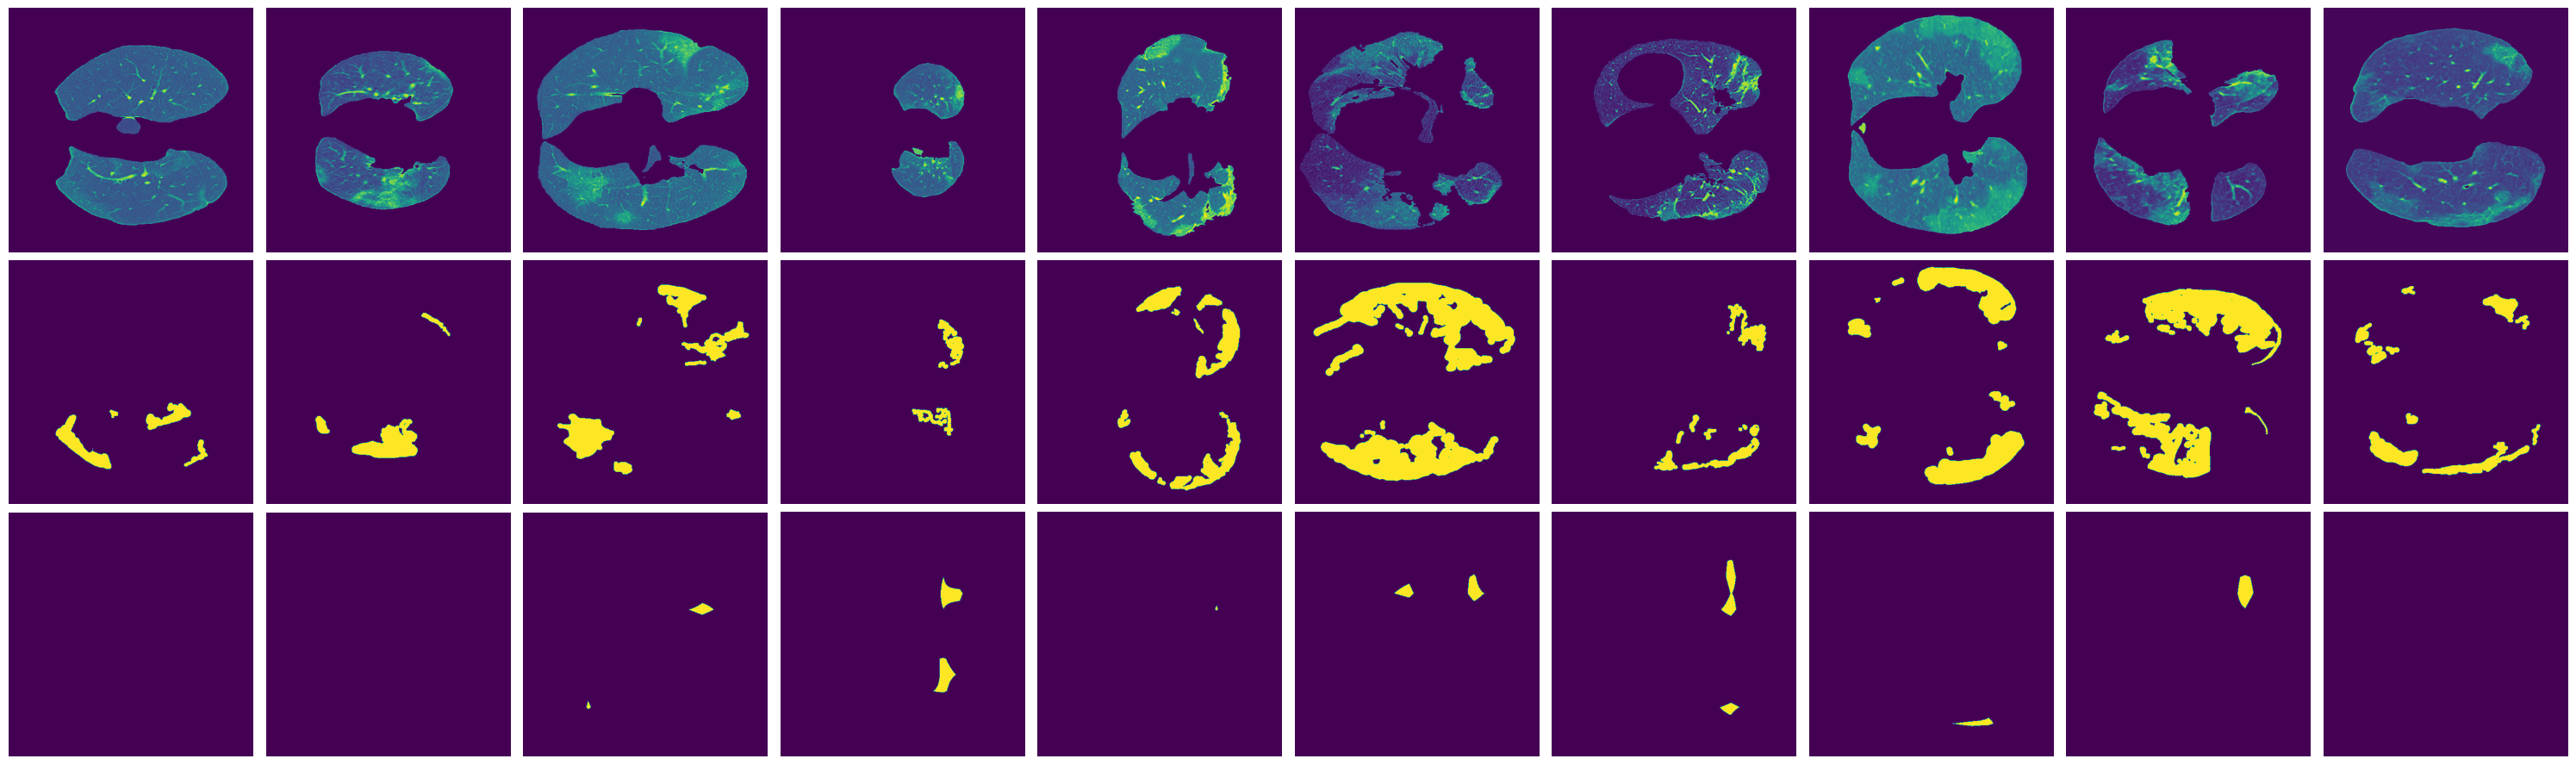

In [18]:
original_images = runner.original_images
gt = runner.original_masks
prediction = runner.predictions
# for i in np.random.randint(4, size=5):
#     for j in np.random.randint(16, size=4):
#         plt.figure(figsize=(15, 5))
#         plt.subplot(1, 3, 1)
#         plt.imshow(original_images[i][j, 0])
#         plt.title('Original Image')
#         plt.axis('off')
#         plt.subplot(1, 3, 2)
#         plt.imshow(gt[i][j])
#         plt.title('Ground Truth')
#         plt.axis('off')
#         plt.subplot(1, 3, 3)
#         plt.imshow(prediction[i][j])
#         plt.title('Predicted Label')
#         plt.axis('off')
# plt.show()

print(original_images[0].shape)
plot_count = 1
fig = plt.figure(figsize=(30, 9))
for i in np.random.randint(7, size=10):
    j = np.random.randint(len(original_images[i]))
    plt.subplot(3, 10, plot_count)
    images = np.squeeze(original_images[i][j], axis=1)
    images = np.squeeze(images, axis=0)
    plt.imshow(images)
    plt.axis('off')
    
    plt.subplot(3, 10, plot_count+10)
    plt.imshow(gt[i][j])
    plt.axis('off')

    plt.subplot(3, 10, plot_count+20)
    plt.imshow(prediction[i][j])
    plt.axis('off')
    plot_count += 1

plt.tight_layout()
plt.show()


In [19]:
# fig.savefig('infection_segmentation_pspnet.pdf', format='pdf', dpi=1200)

In [6]:
# import nibabel as nib
# import numpy as np

# im = nib.load('./data/train/train_im.nii.gz').get_fdata()
# msk = nib.load('./data/train/train_mask.nii.gz').get_fdata()

In [7]:
# print(im.shape, msk.shape)

In [8]:
# validation_im='./data/validation/medseg_im.nii.gz'
# validation_msk='./data/validation/medseg_msk.nii.gz'

# im = nib.load(validation_im).get_fdata()
# msk = nib.load(validation_msk).get_fdata()
# kaku = nib.load('./data/validation/medseg_lung_im.nii.gz').get_fdata()

In [9]:
# plt.subplot(1, 3, 1)
# plt.imshow(kaku[:, :, 88])
# plt.subplot(1, 3, 2)
# plt.imshow(im[:, :, 88])
# plt.subplot(1, 3, 3)
# plt.imshow(msk[:, :, 88])
# plt.show()

In [10]:
# dataloader_args = {"num_workers": 1, "pin_memory": True} if torch.cuda.is_available() else {}
# val_dataset = ImageLoader(im_file=validation_im, msk_file=None, transform=get_val_transforms())
# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, **dataloader_args)
# net = ESFPNetStructure('B0', 160)
# net.load_state_dict(torch.load('./Pretrained/lung_generator.pt')['model_state_dict'])


In [11]:
# net = net.to(torch.device('cuda'))
# for i, (x, y) in enumerate(val_loader):
#     x = x.to(torch.device('cuda'))
#     y_hat = net(x)
#     y_hat = torch.sigmoid(y_hat)
#     y_hat = (y_hat > 0.5) * 1
#     if i == 0:
#         lung_mask = y_hat
#     else:
#         lung_mask = lung_mask.to(torch.device('cuda'))
#         lung_mask = torch.concat((lung_mask, y_hat))
#     x = x.detach().cpu()
#     y_hat = y_hat.detach().cpu()
    
#     lung_mask = lung_mask.detach().cpu()
#     torch.cuda.empty_cache()

# lung_mask = torch.swapaxes(lung_mask, 0, 2)
# lung_mask = torch.swapaxes(lung_mask, 0, 1)
# print(lung_mask.shape)

In [12]:
# lung_mask = lung_mask.detach().cpu().numpy()
# lung_mask = lung_mask.astype('float')


In [13]:
# nifti_lung_mask = nib.Nifti1Image(lung_mask, affine=np.eye(4))
# nib.save(nifti_lung_mask, './data/MedSeg/medseg_lung_msk.nii.gz')

In [14]:
# lung_regions = np.zeros(lung_mask.shape)
# for i in range(lung_mask.shape[2]):
#     lung_index = lung_mask[:, :, i] != 0
#     ignore_index = lung_mask[:, :, i] == 0
#     lung_regions[:, :, i][lung_index] = im[:, :, i][lung_index]
#     lung_regions[:, :, i][ignore_index] = np.min(im[:, :, i][ignore_index])

In [15]:
# nifti_lung_region = nib.Nifti1Image(lung_regions, affine=np.eye(4))
# nib.save(nifti_lung_region, './data/MedSeg/medseg_lung_im.nii.gz')

In [16]:

# print(im.shape)
# plt.subplot(1, 2 ,1)
# plt.imshow(im[:, :, 88])
# plt.subplot(1, 2 ,2)
# plt.imshow(lung_regions[:, :, 88])